# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mikhael Alexandro Barak
- **Email:** 2022105370@student.kalbis.ac.id
- **ID Dicoding:** ale_barak

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda secara musiman atau bulanan?
2. Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd  # Digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Digunakan untuk membuat visualisasi statis, interaktif, dan animasi
import folium  # Digunakan untuk membuat peta interaktif
import seaborn as sns

# Mengimpor modul drive dari library google.colab untuk mengakses Google Drive
from google.colab import drive

## Data Wrangling

### Gathering Data

In [6]:


# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True, untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'hour.csv' di Google Drive
file_path_hour = '/content/drive/MyDrive/hour.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_hour'
data_hour = pd.read_csv(file_path_hour)

# Menampilkan 5 baris pertama dari DataFrame 'data_hour' untuk melihat pratinjau data
data_hour.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Kode tersebut membaca file **`hour.csv`** dari Google Drive, memuatnya ke dalam DataFrame menggunakan pandas, dan menampilkan 5 baris pertama untuk melihat isi data.

### Assessing Data

In [7]:
# Fungsi untuk assessing data
def assess_data(df, name):
    print(f"--- {name.upper()} ---")
    print(f"Dimensi Dataset: {df.shape}\n")  # Dimensi dataset

    # Menggunakan info() untuk memberikan gambaran umum tentang DataFrame
    print("\nGambaran Umum Dataset (info):")
    print(df.info())  # Menampilkan informasi mengenai jumlah non-null dan tipe data per kolom

    # Menampilkan statistik deskriptif dengan describe()
    print("\nStatistik Deskriptif:")
    print(df.describe())  # Statistik deskriptif untuk kolom numerik

    print("\nNilai Unik Per Kolom:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    # Memeriksa apakah ada duplikasi data
    print("\nJumlah Duplikasi Data:")
    print(df.duplicated().sum())  # Menampilkan jumlah duplikat

    # Memeriksa nilai yang hilang (NaN) per kolom
    print("\nJumlah Nilai Hilang (NaN) Per Kolom:")
    print(df.isna().sum())  # Menampilkan jumlah nilai NaN per kolom

    print("-" * 50)


# Mount Google Drive ke direktori '/content/drive' dengan force_remount=True, untuk memastikan drive di-mount ulang meskipun sudah ter-mount sebelumnya.
from google.colab import drive  # Import the drive module
drive.mount('/content/drive', force_remount=True)

# Menentukan path ke file 'hour.csv' di Google Drive
file_path_hour = '/content/drive/MyDrive/hour.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_hour'
import pandas as pd  # Import the pandas library
data_hour = pd.read_csv(file_path_hour)

# Menentukan path ke file 'day.csv' di Google Drive # Define path to day.csv, similar to hour.csv
file_path_day = '/content/drive/MyDrive/day.csv'

# Membaca data dari file CSV menggunakan pandas dan menyimpannya dalam DataFrame bernama 'data_day' #Load data_day
data_day = pd.read_csv(file_path_day)

# Melakukan assessing untuk masing-masing dataset
assess_data(data_day, "Dataset Day")
assess_data(data_hour, "Dataset Hour")

Mounted at /content/drive
--- DATASET DAY ---
Dimensi Dataset: (731, 16)


Gambaran Umum Dataset (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usag

**Insight:**
Kode tersebut membaca file **`day.csv`** dan **`hour.csv`** dari Google Drive, lalu mengevaluasi struktur, statistik deskriptif, nilai unik, duplikasi, dan nilai hilang di masing-masing dataset menggunakan fungsi `assess_data`.

### Cleaning Data

In [8]:
# Cleaning Data untuk Dataset

def clean_data(df):
    """
    Fungsi untuk membersihkan dataset:
    1. Menyesuaikan tipe data jika diperlukan
    """
    print(f"--- Sebelum Pembersihan ---")
    print(f"Tipe Data Tiap Kolom:\n{df.dtypes}")
    print("-" * 50)

    # Konversi tipe data jika diperlukan (contoh: kolom tanggal)
    if 'dteday' in df.columns:  # Jika kolom 'dteday' ada di dataset
        df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

    print(f"--- Setelah Pembersihan ---")
    print(f"Tipe Data Tiap Kolom Setelah Penyesuaian:\n{df.dtypes}")
    print("-" * 50)

    return df

# Membersihkan Dataset Day
data_day_cleaned = clean_data(data_day)

# Membersihkan Dataset Hour
data_hour_cleaned = clean_data(data_hour)


--- Sebelum Pembersihan ---
Tipe Data Tiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
--------------------------------------------------
--- Setelah Pembersihan ---
Tipe Data Tiap Kolom Setelah Penyesuaian:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64

**Insight:**
Kode ini memeriksa dan menyesuaikan tipe data kolom untuk memastikan data siap dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# 1. Melihat distribusi statistik data numerik
print("Distribusi Statistik Data Numerik:")
print(data_day_cleaned.describe())

# 2. Distribusi kategori pada kolom non-numerik
print("\nDistribusi Kategori pada Kolom Non-Numerik:")
for col in ['season', 'workingday', 'weathersit']:
    if col in data_day_cleaned.columns:
        print(f"\n{col}:")
        print(data_day_cleaned[col].value_counts())

# 3. Korelasi antar kolom numerik
print("\nKorelasi Antar Kolom Numerik:")
correlation_matrix = data_day_cleaned.corr(numeric_only=True) # Add numeric_only=True
print(correlation_matrix)

# 4. Analisis tambahan: Mencari rentang waktu data
if 'dteday' in data_day_cleaned.columns:
    print("\nRentang Waktu Data:")
    print(f"Data dimulai dari {data_day_cleaned['dteday'].min()} hingga {data_day_cleaned['dteday'].max()}")


Distribusi Statistik Data Numerik:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000  

**Insight:**
Kode ini memberikan gambaran statistik, distribusi kategori, korelasi antar variabel, dan rentang waktu untuk dataset yang telah dibersihkan.








## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola penggunaan sepeda secara musiman atau bulanan?

<ipython-input-17-b9e214ee6bb8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=monthly_usage, palette='Blues_d')


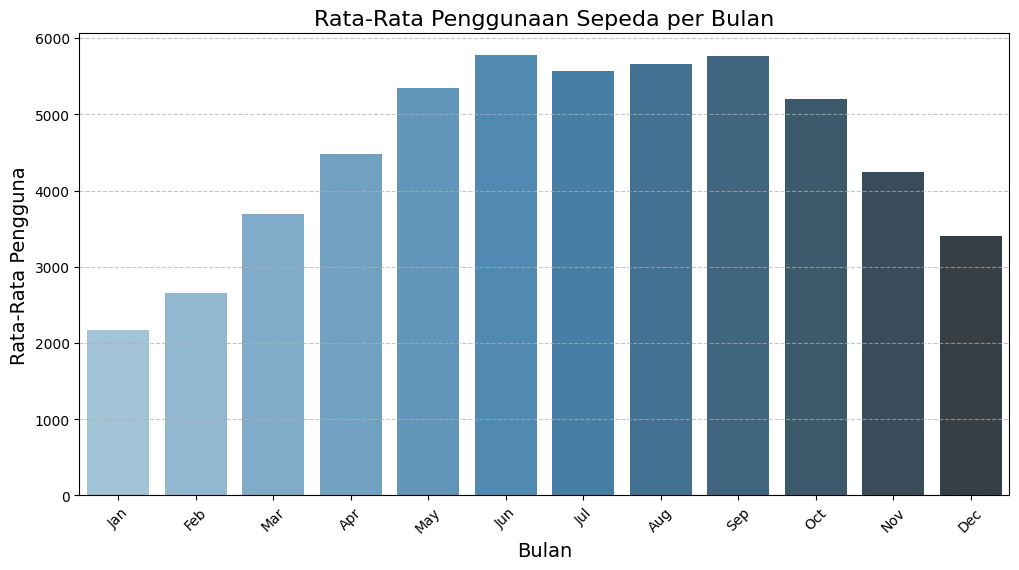

In [17]:

# 1. Visualisasi pola penggunaan sepeda secara musiman atau bulanan
# Agregasi rata-rata pengguna sepeda per bulan
monthly_usage = data_day_cleaned.groupby('mnth')['cnt'].mean().reset_index()

# Map angka bulan ke nama bulan untuk keterbacaan
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_usage['mnth'] = monthly_usage['mnth'].map(lambda x: month_names[x - 1])

# Visualisasi rata-rata penggunaan sepeda per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=monthly_usage, palette='Blues_d')
plt.title('Rata-Rata Penggunaan Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-Rata Pengguna', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### Pertanyaan 2:
Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

<ipython-input-18-abaebf05a30e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='coolwarm')


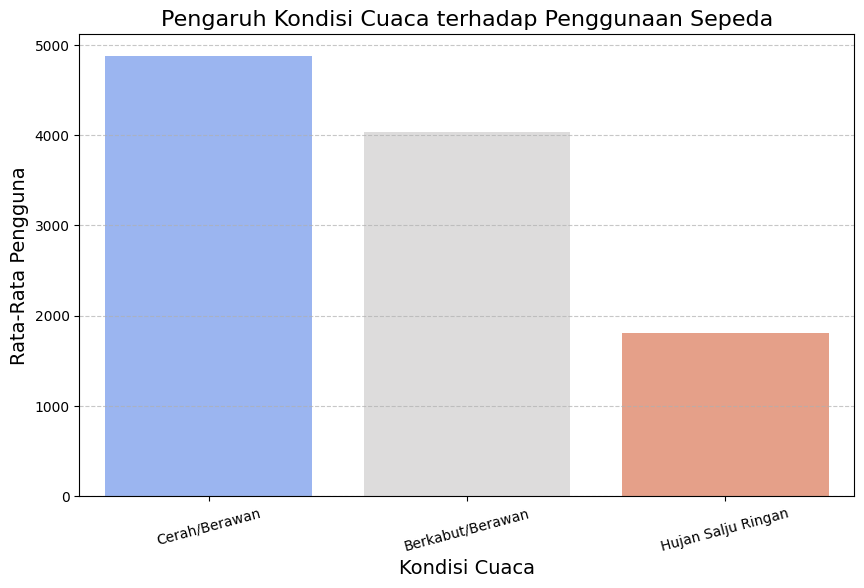

In [18]:
# 2. Visualisasi pengaruh cuaca terhadap jumlah pengguna sepeda
# Agregasi rata-rata pengguna sepeda berdasarkan kondisi cuaca
weather_usage = data_day_cleaned.groupby('weathersit')['cnt'].mean().reset_index()

# Map kondisi cuaca ke deskripsi yang lebih jelas
weather_labels = {1: 'Cerah/Berawan', 2: 'Berkabut/Berawan', 3: 'Hujan Salju Ringan', 4: 'Hujan Salju Deras'}
weather_usage['weathersit'] = weather_usage['weathersit'].map(weather_labels)

# Visualisasi rata-rata penggunaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_usage, palette='coolwarm')
plt.title('Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Rata-Rata Pengguna', fontsize=14)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
Visualisasi Bulanan: Menghitung rata-rata penggunaan sepeda per bulan dan menampilkannya dalam grafik batang dengan nama bulan yang mudah dibaca.

Pengaruh Cuaca: Menghitung rata-rata penggunaan sepeda berdasarkan kondisi cuaca dan menampilkannya dalam grafik batang dengan label cuaca yang lebih jelas.

## Analisis Lanjutan (Opsional)

## Conclusion

1.  Penggunaan sepeda menunjukkan pola musiman, dengan bulan tertentu memiliki rata-rata pengguna lebih tinggi, kemungkinan karena faktor cuaca atau musim.

2.  Kondisi cuaca memengaruhi jumlah pengguna sepeda, di mana cuaca cerah atau berawan cenderung meningkatkan penggunaan, sementara hujan atau salju menurunkannya.
